# House Price Prediction Kaggle Competition

# Advanced Regression Techniques


1. Import Packages
- Load Datasets
- Explanatory Data Analysis (EDA)
    1. Univariate Analysis
        1. Histograms
        - Descriptive Statistics
        - Categorical and Numerical Features
    2. Bivariate Analysis
        1. Regression Plots
        2. Correlation
- Outliers
- Missing Values
    1. Drop Unnecessary Features
    - Impute Missing Values (NONE)
    - Impute With Median
    - Impute With Mode
    - Impute Randomly
- Data Transformations
    1. Log Transform
    - Binning
    - Dummification
    - Other Manipulations
- Modelling
    1. Preparations
        1. Train / Test Split
        - Choose Model
    2. Multiple Linear Regression
    3. Ridge
    4. Lasso
    5. ElasticNet
    6. Random Forest
    7. XGBoost
- Submission

# 1. Import Packages

In [390]:
from datetime import datetime
from scipy.stats import probplot

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import pprint
%load_ext autoreload
%autoreload 2
pd.options.display.max_columns = 300
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV, BayesianRidge
import xgboost as xgb
import re
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#For Plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
warnings.filterwarnings('ignore')
import plotly.figure_factory as ff

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Settings for figure display

In [391]:
#Show all columns, rows, width
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 2. Load Datasets

In [392]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [393]:
print(train.shape)
print("*"*30)
print(test.shape)

(1460, 81)
******************************
(1459, 80)


In [394]:
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


#### Data Dimensions:
Train = (1460, 81)
******************************
Test = (1459, 80)

# 3. Explanatory Data Analysis (EDA)

## A. Univariate Analysis

### a. Histograms

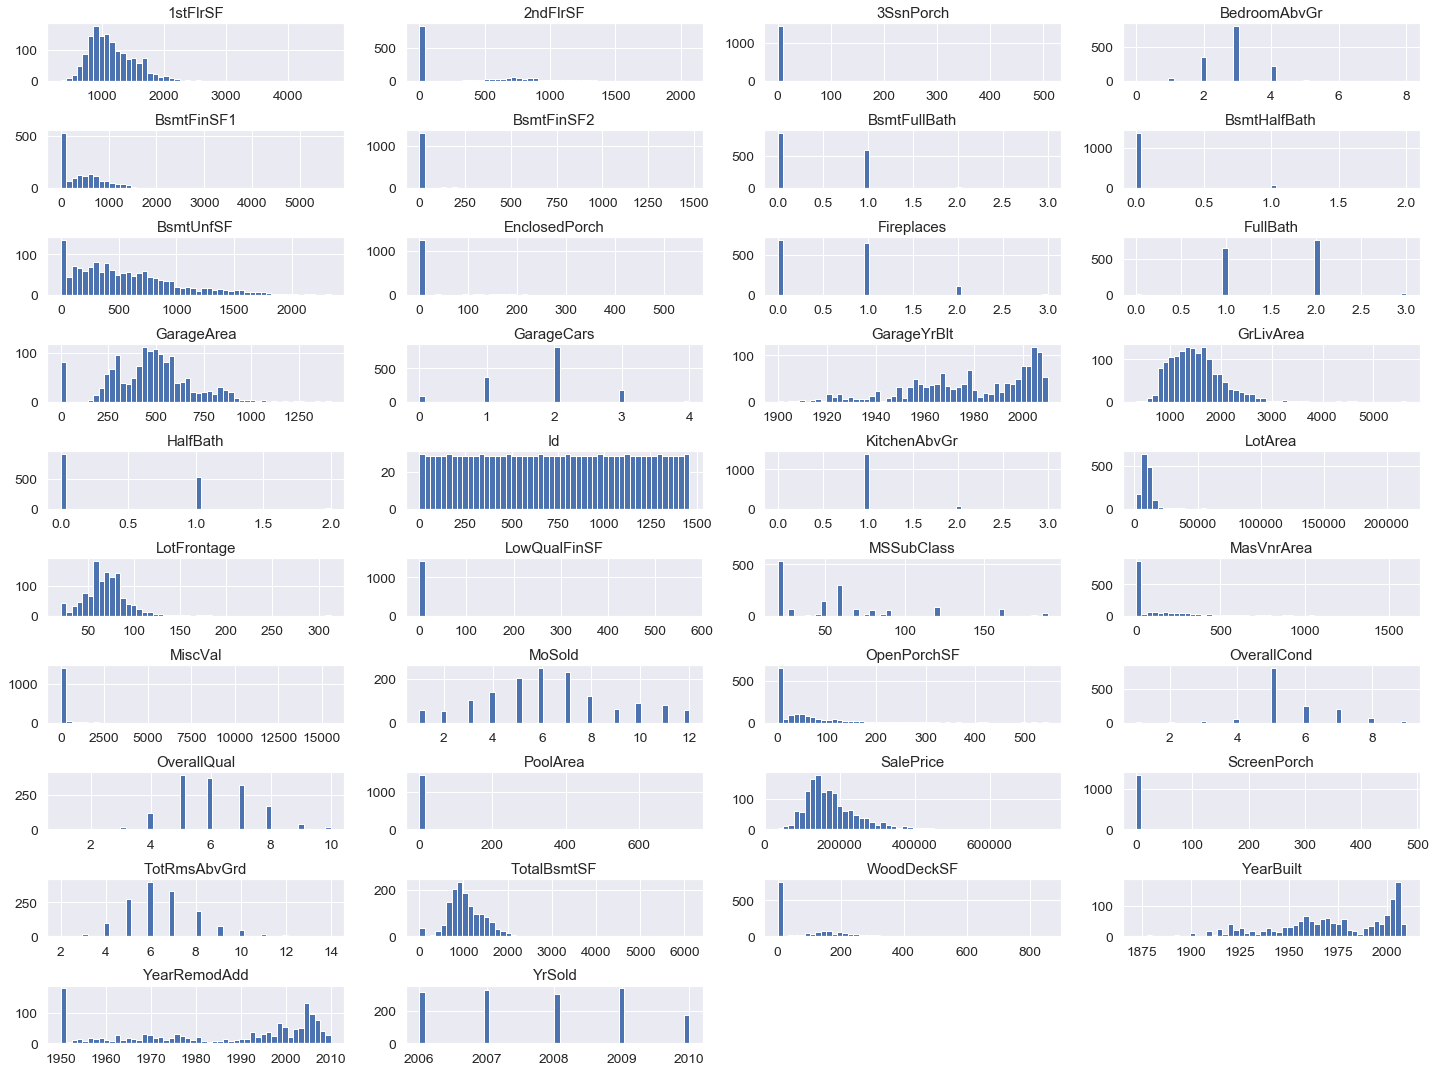

In [395]:
train.hist(bins=50, figsize=(20,15), layout=(10,4))
plt.tight_layout()

### b. Descriptive Statistics

In [396]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

In [397]:
df_categorical = train.loc[:, train.dtypes == "object"]
for cat in df_categorical:
    print('Categorical variables and their counts for each class\n')
    print(df_categorical[cat].value_counts())
    print('\n', '*|*' * 30, '\n')

Categorical variables and their counts for each class

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

 *|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|* 

Categorical variables and their counts for each class

Pave    1454
Grvl       6
Name: Street, dtype: int64

 *|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|* 

Categorical variables and their counts for each class

Grvl    50
Pave    41
Name: Alley, dtype: int64

 *|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|* 

Categorical variables and their counts for each class

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

 *|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|**|* 

Categorical variables and their counts for each class

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandCont

### c. Numerical and Categorical Features

Assign numerical and categorical features to different variables. What are numerical and categorical features? How many are there? 

In [398]:
numerical_feats = train.dtypes[train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  38
Number of Categorical features:  43


#### Number of Numerical features:  38                         
#### Number of Categorical features:  43

In [399]:
print('Numerical Features')
print(train[numerical_feats].columns)
print("*"*100)
print("*"*100)
print('Categorical Features')
print(train[categorical_feats].columns)
print("*"*100)

Numerical Features
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')
****************************************************************************************************
****************************************************************************************************
Categorical Features
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', '

## B. Bivariate Analysis

### a. Regression Plots

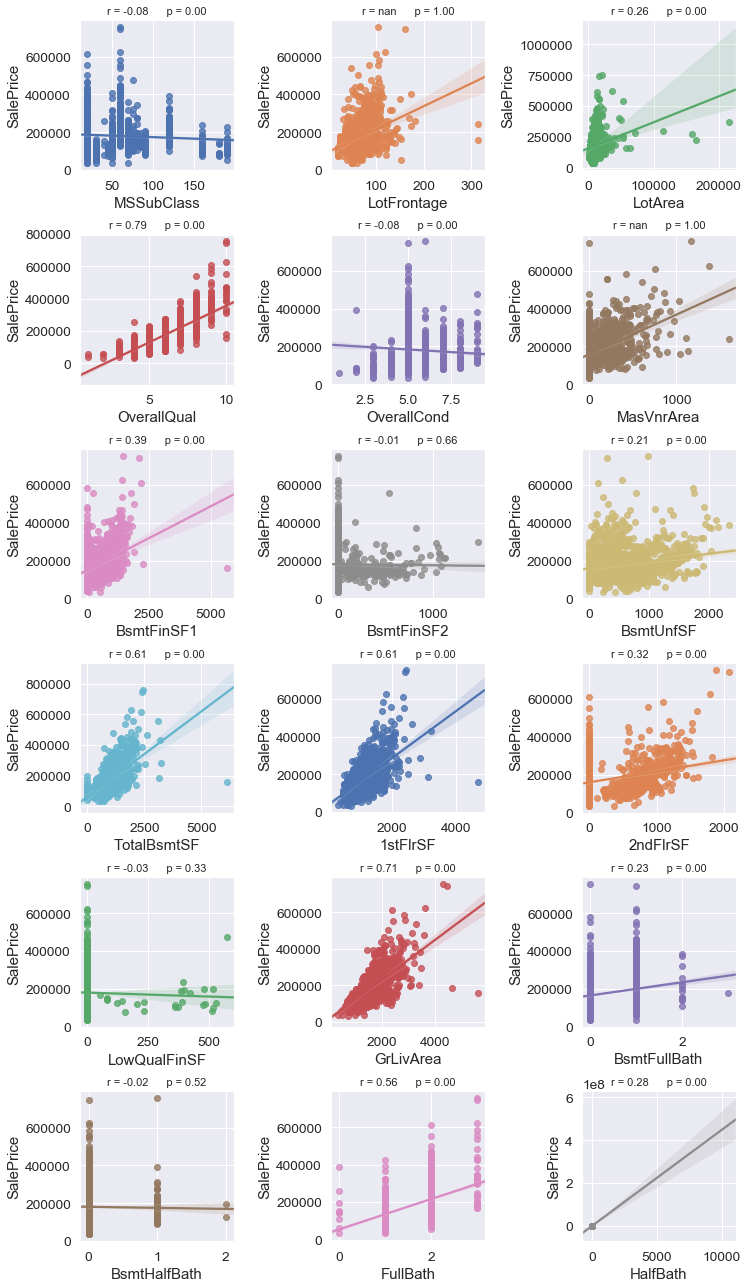

In [400]:
target = 'SalePrice'

nr_rows = 6
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_feats)
li_not_plot = ['Id', 'SalePrice', 'SalePrice_Log', 'MoSold','YearBuilt','YearRemodAdd','YrSold','GarageYrBlt','PoolArea']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            #print(li_plot_num_feats[i])
            sns.regplot(train[li_plot_num_feats[i]], train[target], ax = axs[r][c])
            stp = stats.pearsonr(train[li_plot_num_feats[i]], train[target])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
#plt.savefig('housing_variables.pdf')

### b. Correlation

Find columns with strong correlation to target

In [401]:
corr = train.corr()
corr_abs = corr.abs()

nr_num_cols = len(numerical_feats)
ser_corr = corr_abs.nlargest(nr_num_cols, target)[target]


cols_abv_corr_limit = list(ser_corr[ser_corr.values > .3].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= .3].index)

In [402]:
ser_corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

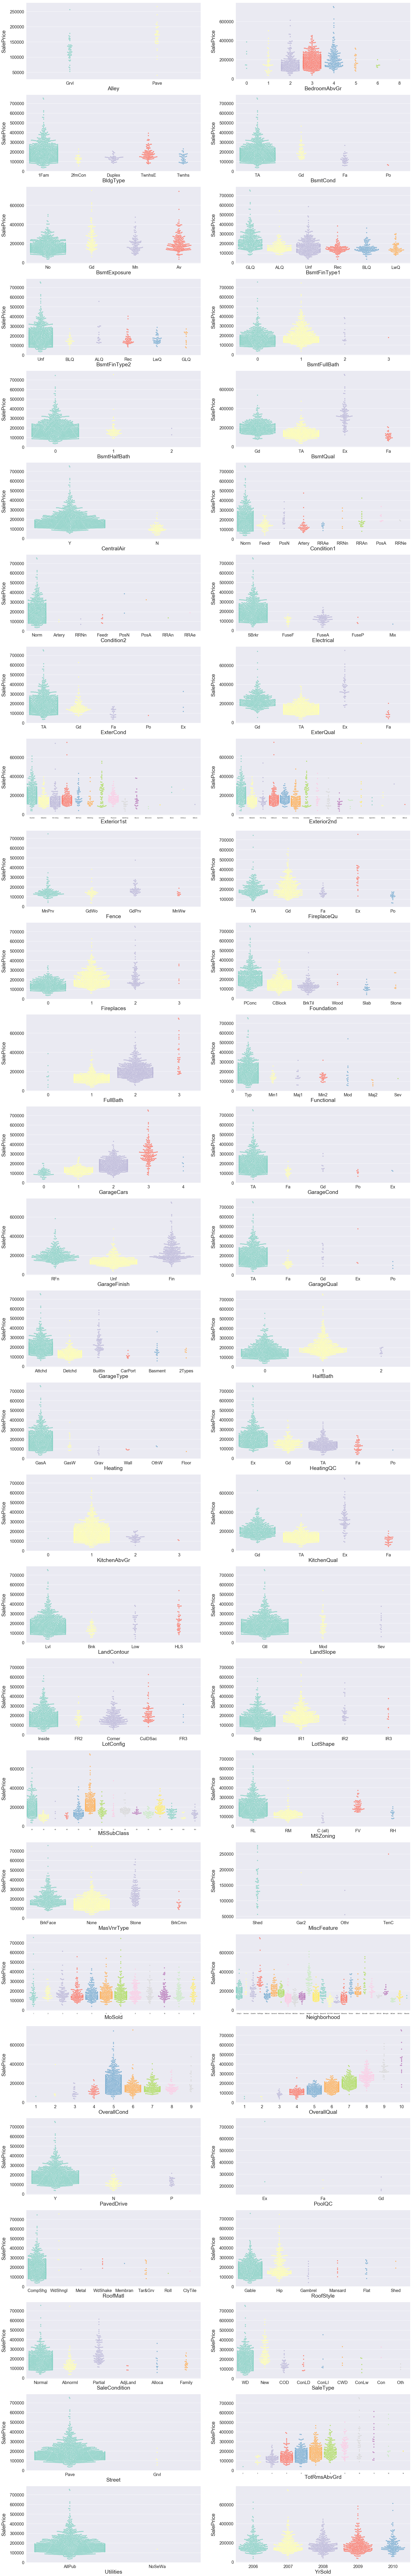

In [414]:
cat_features = ['Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 
                'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 
                'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 
                'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 
                'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageCars', 
                'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'HalfBath', 
                'Heating', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 
                'LandSlope', 'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 
                'MasVnrType', 'MiscFeature', 'MoSold', 'Neighborhood', 'OverallCond', 
                'OverallQual', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 
                'SaleCondition', 'SaleType', 'Street', 'TotRmsAbvGrd', 'Utilities', 'YrSold']

#for sorting of charts alphabetically (list above)
fig, axs = plt.subplots(ncols=2, nrows=28, figsize=(18, 120))
plt.subplots_adjust(right=1.5, top=1.5)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(28, 2, i)
    sns.swarmplot(x=feature, y='SalePrice', data=train, palette='Set3')
        
    plt.xlabel('{}'.format(feature), size=25)
    plt.ylabel('SalePrice', size=25, labelpad=15)
    
    for j in range(2):
        if train[feature].value_counts().shape[0] > 10:        
            plt.tick_params(axis='x', labelsize=7)
        else:
            plt.tick_params(axis='x', labelsize=20)
        plt.tick_params(axis='y', labelsize=20)
            
plt.show()

#### Conclusions: Categorical Variables

Cat Variables w/ Strong Correlation :
    OverallQual
    'MSZoning', 
    'Neighborhood', 
    'Condition2', 
    'MasVnrType', 
    'ExterQual', 
    'BsmtQual',
    'CentralAir', 
    'Electrical',
    'KitchenQual', 
    'SaleType'
    
  
  
Cat Variables w/ Weak Correlation :
    Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
    'LotConfig', 'LandSlope', 'Condition1', 'BldgType', 'HouseStyle', 
    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 
    'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
    'Heating', 'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 
    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 
    'MiscFeature', 'SaleCondition'


In [ ]:
catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]
      

In [ ]:
nr_feats = len(cols_abv_corr_limit)

In [ ]:
def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

#### Correlation matrix: all numerical features

Determine features with correlation above threshold

In [ ]:
plot_corr_matrix(train, nr_feats, target)


# 4. Outliers

Below regression plot shows that there are 2 houses with huge living area but their prices are low. Those two datapoints are outliers and we will remove them.

In [ ]:
sns.regplot(train['GrLivArea'],train['SalePrice'])

In [ ]:
train['GrLivArea'].sort_values(ascending=False).head(5)

Remove outliers

In [ ]:
train = train[train['GrLivArea']<4600]

Confirm that 2 outliers are removed from the training

In [ ]:
print(train.shape)

# 5. Missing Values

Combine train and test datasets to easily apply transformations.

In [409]:
df_concat = pd.concat([train, test], ignore_index=True)

## A. Drop Unnecassary Features
In order to avoid high multicolliniearity, drop below columns:

BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF = TotalBsmtSF

1stFlrSF + 2ndFlrSF + LowQualFinSF = GrLivArea

OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch + WoodDeckSF = TotalPorchSF

In [ ]:
df_concat.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)
df_concat.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'], axis=1, inplace=True)
df_concat.drop(['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','WoodDeckSF'], axis=1, inplace=True)

MiscVal column has too many 0s so that it holds no value. Drop it!

In [412]:
df_concat['MiscVal'].value_counts().head()

0      2816
400      18
500      13
450       9
600       8
Name: MiscVal, dtype: int64

In [413]:
df_concat.drop(['MiscVal'], axis=1, inplace=True)

## B. Impute Missing Values (NONE)

Below columns have NULL values but they are not necessarily missing values e.g. PoolQC null means "no pool"

In [415]:
df_concat['Alley'].fillna('NoAlley', inplace = True)
df_concat['BsmtQual'].fillna('NoBsmt', inplace = True)
df_concat['BsmtCond'].fillna('NoBsmt', inplace = True)
df_concat['BsmtExposure'].fillna('NoBsmt', inplace = True)
df_concat['BsmtFinType1'].fillna('NoBsmt', inplace = True)
df_concat['BsmtFinType2'].fillna('NoBsmt', inplace = True)
df_concat['FireplaceQu'].fillna('NoFirePl', inplace = True)
df_concat['GarageType'].fillna('NoGarage', inplace = True)
df_concat['GarageFinish'].fillna('NoGarage', inplace = True)
df_concat['GarageQual'].fillna('NoGarage', inplace = True)
df_concat['GarageCond'].fillna('NoGarage', inplace = True)
df_concat['PoolQC'].fillna('NoPool', inplace = True)
df_concat['Fence'].fillna('NoFence', inplace = True)
df_concat['MiscFeature'].fillna('NoMiscFeature', inplace = True)
df_concat['MasVnrType'].fillna('NoVeneer', inplace = True)
df_concat['MasVnrType'].replace('None','NoVeneer', inplace=True) # None means there is no veneer. Pass None to category NoVeneer

## C. Impute With Median

GarageCars, BsmtFullBath, BsmtHalfBath columns have very few nulls. Impute them with median before casting to category.

In [262]:
med_GarageCars = df_concat['GarageCars'].median()
df_concat['GarageCars'].fillna(med_GarageCars, inplace = True)

med_BsmtFullBath = df_concat['BsmtFullBath'].median()
df_concat['BsmtFullBath'].fillna(med_BsmtFullBath, inplace = True)

med_BsmtHalfBath = df_concat['BsmtHalfBath'].median()
df_concat['BsmtHalfBath'].fillna(med_BsmtHalfBath, inplace = True)

## D. Impute With Mode

Below columns in the df_concat can be imputed using the most common class (mode).

In [417]:
df_concat['KitchenQual'].fillna(df_concat['KitchenQual'].value_counts().index[0], inplace = True)
df_concat['Utilities'].fillna(df_concat['Utilities'].value_counts().index[0], inplace = True)
df_concat['Functional'].fillna(df_concat['Functional'].value_counts().index[0], inplace = True)
df_concat['SaleType'].fillna(df_concat['SaleType'].value_counts().index[0], inplace = True)
df_concat['Exterior1st'].fillna(df_concat['Exterior1st'].value_counts().index[0], inplace = True)
df_concat['Exterior2nd'].fillna(df_concat['Exterior2nd'].value_counts().index[0], inplace = True)
df_concat['MSZoning'].fillna(df_concat['MSZoning'].value_counts().index[0], inplace = True)
df_concat['Electrical'].fillna(df_concat['Electrical'].value_counts().index[0], inplace = True)

## E. Impute Randomly

Fill null values randomly using non-NA values of that column

In [263]:
def fill_with_random(df2, column):
    df = df2.copy()
    df[column] = df[column].apply(lambda x: np.random.choice(df[column].dropna().values) if np.isnan(x) else x)
    return df


df_concat = fill_with_random(df_concat, 'GarageArea')
df_concat = fill_with_random(df_concat, 'TotalBsmtSF')
df_concat = fill_with_random(df_concat, 'MasVnrArea')
df_concat = fill_with_random(df_concat, 'LotFrontage')



#### CHECK missing data again after imputation

In [416]:
total = df_concat.isnull().sum().sort_values(ascending=False)
percent = (df_concat.isnull().sum()/df_concat.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

Total   Percent
SalePrice     1459  0.499829
LotFrontage    486  0.166495
GarageYrBlt    159  0.054471
MasVnrArea      23  0.007879
MSZoning         4  0.001370

# 6. Data Transformations

## A. Log Transform

Apply log tranformations for skewed columns.
Target column is highly skewed.

Skewness: 1.881296
Kurtosis: 6.523067


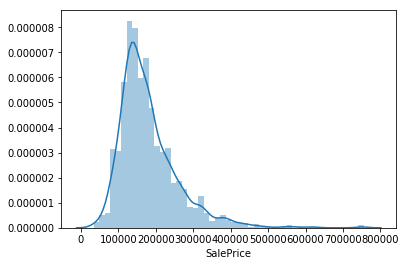

In [249]:
sns.distplot(train['SalePrice']);

# skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

After log transformation, distribution of SalePrice is closer to normal distribution and skewness and kurtosis values are smaller.

Skewness: 0.121568
Kurtosis: 0.804764


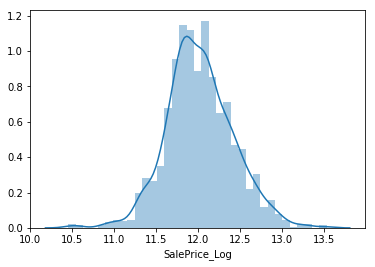

In [250]:
train['SalePrice_Log'] = np.log(train['SalePrice'])

sns.distplot(train['SalePrice_Log']);

# skewness and kurtosis
print("Skewness: %f" % train['SalePrice_Log'].skew())
print("Kurtosis: %f" % train['SalePrice_Log'].kurt())

# dropping old column
train.drop('SalePrice', axis= 1, inplace=True)

GrLivArea and LotArea are also skewed.

Skewness: 1.069300
Kurtosis: 2.456625


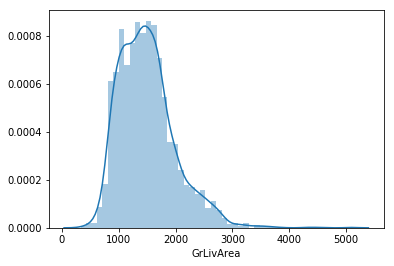

In [252]:
sns.distplot(df_concat['GrLivArea']);

#skewness and kurtosis
print("Skewness: %f" % df_concat['GrLivArea'].skew())
print("Kurtosis: %f" % df_concat['GrLivArea'].kurt())

Skewness: 13.116240
Kurtosis: 275.639934


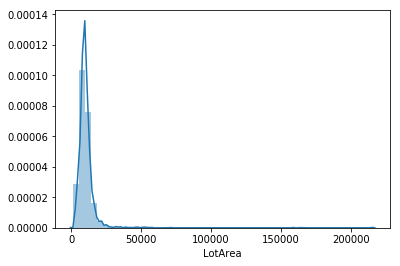

In [253]:
sns.distplot(df_concat['LotArea']);

#skewness and kurtosis
print("Skewness: %f" % df_concat['LotArea'].skew())
print("Kurtosis: %f" % df_concat['LotArea'].kurt())

Apply log transformation to both of them, drop original columns

In [254]:
df_concat['GrLivArea_Log'] = np.log(df_concat['GrLivArea'])
df_concat['LotArea_Log'] = np.log(df_concat['LotArea'])
df_concat.drop('GrLivArea', inplace= True, axis = 1)
df_concat.drop('LotArea', inplace= True, axis = 1)


Check for skewness/kurtosis and distribution of values after log transformation

GrLivArea_Log
Skewness: -0.022845
Kurtosis: 0.104123
****************************************************************************************************
GrLivArea_Log
Skewness: -0.533449
Kurtosis: 3.751158
****************************************************************************************************


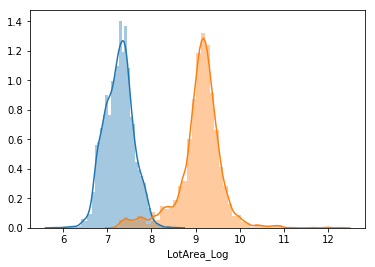

In [255]:
for col in ['GrLivArea_Log','LotArea_Log']:
    print('GrLivArea_Log')
    sns.distplot(df_concat[col])

    #skewness and kurtosis
    print("Skewness: %f" % df_concat[col].skew())
    print("Kurtosis: %f" % df_concat[col].kurt())
    print('*' * 100)

## B. Binning

After missing value imputation and other manipulations, below columns are now ready for binning. Bin them and then add them to the categorical variables.

In [418]:
df_concat['MoSold'] = pd.cut(df_concat['MoSold'], [1,4,8,12], include_lowest=True)
df_concat['YearBuilt'] = pd.cut(df_concat['YearBuilt'], [1872,1950,1980,2000,2010], include_lowest=True)
df_concat['YearRemodAdd'] = pd.cut(df_concat['YearRemodAdd'], [0,1,1980,2000,2010], include_lowest=True)
df_concat['GarageYrBlt'] = pd.cut(df_concat['GarageYrBlt'], [0,1894,1950,1980,2000,2010], include_lowest=True)
df_concat['PoolArea'] = pd.cut(df_concat['PoolArea'], [0,1,800], include_lowest=True)

## C. Dummification

Note that some numerical variables are not continuous. They must be regarded as categorical variables:

- MSSubClass
- OverallQual
- OverallCond
- BsmtFullBath	
- BsmtHalfBath	
- FullBath
- HalfBath
- BedroomAbvGr
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- GarageCars
- YrSold

Let's add them to the **categorical_features** dataframe, remove from the **numerical_features** dataframe and see the distributions of classes for each variable.

Below columns need special attention. We will first deal with missingness, bin them and then add to the categorical variables.
- MoSold
- YearBuilt
- YearRemodAdd
- GarageYrBlt

In [267]:
from_num_to_cat = ['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YearBuilt','YearRemodAdd','YrSold','GarageYrBlt','PoolArea']

In [268]:
df_concat[from_num_to_cat] = df_concat[from_num_to_cat].apply(lambda x: x.astype('category'))

In [269]:
# Numeric variables
numerical_feats = df_concat.dtypes[df_concat.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

# Categorical variables
categorical_feats = df_concat.dtypes[df_concat.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  26
Number of Categorical features:  43


In [311]:
df_concat_dummified = pd.get_dummies(df_concat, drop_first=True)

## D. Other Manipulations

In test dataset GarageYrBlt has a column with value of 2207. Update it to 2010 which is the max after 2207.

In [260]:
df_concat.loc[df_concat['GarageYrBlt'] == 2207,'GarageYrBlt'] = 2010

Houses without a garage have NAs. Fill them with year 0.

In [261]:
df_concat['GarageYrBlt'].fillna(0, inplace = True)

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
According to this description, set YearRemodAdd = 0 if YearRemodAdd == YearBuilt, to make it ready for binning.

In [265]:
df_concat.loc[df_concat['YearRemodAdd'] == df_concat['YearBuilt'], 'YearRemodAdd'] = 0

# 7. Modelling

## A. Preparations
Now, we are done with missing value imputation and all data transformations. It is time to split train and test.

In [419]:
test = df_concat_dummified.loc[df_concat.SalePrice_Log.isnull(),]
train = df_concat_dummified.loc[~df_concat.SalePrice_Log.isnull(),]
test.drop('SalePrice_Log', inplace=True, axis=1)
test.reset_index(drop=True, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'SalePrice_Log'

Before fitting the models, check shape of datasets.

In [319]:
submission = pd.DataFrame()
submission['Id'] = test.Id

Y=train['SalePrice_Log']
X=train.loc[:, ~train.columns.isin(['Id','SalePrice_Log'])]
test2=test.loc[:, ~test.columns.isin(['Id'])]

In [320]:
print(X.shape)
print(test2.shape)
print(set(X.columns) - set(test2.columns))
print(len(set(X.columns) - set(test2.columns)))
print(set(test2.columns) - set(X.columns))

(1458, 254)
(1459, 254)
set()
0
set()


### a. Train / Test Split

We use cross_val_score for its simplicity to estimate MSE for different models.

In [322]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=.33)

### b. Choose Model

Models: MLR, Ridge, Lasso, ElasticNet, RandomForest, XGBoost

In [329]:
model_list = ['Lasso','XGBoost']

## B. Multiple Linear Regression

In [32]:
# MLR
#if 'MLR' in model_list:
    
# looking at the results, we choose to run Ridge regression with below settings:
#mlr_selected = RidgeCV(alphas=[0], cv=10, normalize=True, fit_intercept=True)
#mlr_selected.fit(X, Y)

#y_pred_ridge = mlr_selected.predict(test2)

#    lm = Ridge(alpha = 0)
#    lm.fit(X, Y)
#    scores = cross_val_score(estimator=lm, X=X_train, y=Y_train, cv=10)
#    #cv_list = [3, 5, 10]
#    print('Best R^2 for MLR is: %.5f' %(lm.score(X,Y)))
#    print('Test Scores: {}'.format(scores))
#    print('Mean of Test Scores: {}'.format(scores.mean()))
#    print('Std. Deviation of Test Scores: {}'.format(scores.std()))

## C. Ridge

In [33]:
# Ridge with Cross Validation

# String to Boolean
def str2bool(v):
    return v.lower() in ("true")


if 'Ridge' in model_list:
    
    # Alpha range
    alphas = np.linspace(0.01, 5, 200)
    
    # CV range
    sqrt_n = int(np.sqrt(len(X_train))) # Square root of # of obs. (CV = 31)
    cv_list = [3, 5, 10, sqrt_n]
    CV_index = []
    
    # Normalization
    norm_list = ['False', 'True']
    norm_list2 = []
    
    # Intercept
    intercept_list = ['False', 'True']
    intercept_list2 = []
    
    # Initialization of lists to be added to dict_
    best_alphas = []
    best_R2s = []
    best_R2s_test = []
    best_MSEs = []
    mean_CVscores = []
    std_CVscores = []
    
    # Initialization of dictionary object to cast to df
    dict_ = {}
    
    # Loop for different values of CV and normalization type using the alpha range specified
    for cv in cv_list:
        for norm in norm_list:
            for intercept in intercept_list:
            
                if cv == None:
                    cv_name = 'LOOCV' # Leave one out CV (Generalized Cross Validation)
                else:
                    cv_name = str(cv)
                    
                print('CV: %s' %cv_name)
                print('Normalize: %s' %norm)
                print('Intercept: %s' %intercept)

                ridgeCV = RidgeCV(alphas=alphas, cv=cv, normalize=str2bool(norm), fit_intercept=str2bool(intercept), scoring = 'neg_mean_squared_error')
                ridgeCV.fit(X_train,Y_train)
                y_pred_ridge = ridgeCV.predict(test2)
                print('Best alpha for Ridge is: %.2f' %(ridgeCV.alpha_))
                print('Best R^2 for Ridge (training) is: %.5f' %(ridgeCV.score(X_train,Y_train)))
                print('Best R^2 for Ridge (test) is: %.5f' %(ridgeCV.score(X_test,Y_test)))

                best_alphas.append(round(ridgeCV.alpha_, 2))
                best_R2s.append(round(ridgeCV.score(X_train,Y_train), 5))
                best_R2s_test.append(round(ridgeCV.score(X_test,Y_test), 5))

                ridge = Ridge(alpha = ridgeCV.alpha_, normalize = str2bool(norm), fit_intercept=str2bool(intercept))
                ridge.fit(X_train, Y_train)
                mse = round(mean_squared_error(Y_test, ridge.predict(X_test)), 5)
                print('MSE for Ridge: %.5f' %mse)

                best_MSEs.append(mse)
                
                if cv == None:
                    cv_new = len(X_train)
                    scores = cross_val_score(estimator=ridge, X=X_train, y=Y_train, cv=cv_new) # Estimate score using cv = (# of obs.)
                else:
                    scores = cross_val_score(estimator=ridge, X=X_train, y=Y_train, cv=cv) # Estimate score using cv = (# of obs.)
                
                # Estimate test scores using cross_val_score
                scores = np.array(list(map(lambda x: round(x,5), scores)))
                avg_score = round(scores.mean(), 5)
                std_score = round(scores.std(), 5)
                print('Test Scores: {}'.format(scores))
                print('Mean of Test Scores: {}'.format(avg_score))
                print('Std. Deviation of Test Scores: {}'.format(std_score))
                print('*' * 50, '\n')

                mean_CVscores.append(avg_score)
                std_CVscores.append(std_score)
                
                CV_index.append('CV_' + cv_name)
                norm_list2.append(norm)
                intercept_list2.append(intercept)

                dict_['Norm_Type'] = norm_list2
                dict_['Intercept_Type'] = intercept_list2
                dict_['best_alphas'] = best_alphas
                dict_['best_R2s'] = best_R2s
                dict_['best_R2s_test'] = best_R2s_test
                dict_['best_MSEs'] = best_MSEs
                dict_['mean_CVscores'] = mean_CVscores
                dict_['std_CVscores'] = std_CVscores

                #print(dict_)

    df_results = pd.DataFrame(dict_, index=CV_index)
    df_results.reset_index(inplace=True)
    df_results.rename({'index':'CV'}, axis=1, inplace=True) #rename index as CV
    #df_results.sort_values(by=['best_MSEs', 'mean_CVscores'], ascending=[True,False], inplace=True)
    print(df_results)

    # looking at the results, we choose to run Ridge regression with below settings:
    ridge_selected = RidgeCV(alphas=[0.16], cv=10, normalize=True, fit_intercept=True)
    ridge_selected.fit(X, Y)
    y_pred_ridge = ridge_selected.predict(test2)

In [34]:
# Lasso with Cross Validation

# String to Boolean
def str2bool(v):
    return v.lower() in ("true")


if 'Lasso' in model_list:
    
    # Alpha range
    alphas = np.linspace(0.01, 5, 200)#logspace(-1, 1, 200)
    
    # CV range
    sqrt_n = int(np.sqrt(len(X_train))) # Square root of # of obs. (CV = 31)
    cv_list = [3, 5, 10, sqrt_n]
    CV_index = []
    
    # Normalization
    norm_list = ['False', 'True']
    norm_list2 = []
    
    # Intercept
    intercept_list = ['False', 'True']
    intercept_list2 = []
    
    # Initialization of lists to be added to dict_
    best_alphas = []
    best_R2s = []
    best_R2s_test = []
    best_MSEs = []
    mean_CVscores = []
    std_CVscores = []
    
    # Initialization of dictionary object to cast to df
    dict_ = {}
    
    # Loop for different values of CV and normalization type using the alpha range specified
    for cv in cv_list:
        for norm in norm_list:
            for intercept in intercept_list:
            
                if cv == None:
                    cv_name = 'LOOCV' # Leave one out CV (Generalized Cross Validation)
                else:
                    cv_name = str(cv)
                    
                print('CV: %s' %cv_name)
                print('Normalize: %s' %norm)
                print('Intercept: %s' %intercept)

                lassoCV = LassoCV(alphas=alphas, cv=cv, normalize=str2bool(norm), fit_intercept=str2bool(intercept))
                lassoCV.fit(X_train,Y_train)
                #y_pred_Lasso = lassoCV.predict(test2)
                print('Best alpha for Lasso is: %.2f' %(lassoCV.alpha_))
                print('Best R^2 for Lasso (training) is: %.5f' %(lassoCV.score(X_train,Y_train)))
                print('Best R^2 for Lasso (test) is: %.5f' %(lassoCV.score(X_test,Y_test)))

                best_alphas.append(round(lassoCV.alpha_, 2))
                best_R2s.append(round(lassoCV.score(X_train,Y_train), 5))
                best_R2s_test.append(round(lassoCV.score(X_test,Y_test), 5))

                lasso = Lasso(alpha = lassoCV.alpha_, normalize = str2bool(norm), fit_intercept=str2bool(intercept))
                lasso.fit(X_train, Y_train)
                mse = round(mean_squared_error(Y_test, lasso.predict(X_test)), 5)
                print('MSE for Lasso: %.5f' %mse)

                best_MSEs.append(mse)
                
                if cv == None:
                    cv_new = len(X_train)
                    scores = cross_val_score(estimator=lasso, X=X_train, y=Y_train, cv=cv_new) # Estimate score using cv = (# of obs.)
                else:
                    scores = cross_val_score(estimator=lasso, X=X_train, y=Y_train, cv=cv) # Estimate score using cv = (# of obs.)
                
                # Estimate test scores using cross_val_score
                scores = np.array(list(map(lambda x: round(x,5), scores)))
                avg_score = round(scores.mean(), 5)
                std_score = round(scores.std(), 5)
                print('Test Scores: {}'.format(scores))
                print('Mean of Test Scores: {}'.format(avg_score))
                print('Std. Deviation of Test Scores: {}'.format(std_score))
                print('*' * 50, '\n')

                mean_CVscores.append(avg_score)
                std_CVscores.append(std_score)
                
                CV_index.append('CV_' + cv_name)
                norm_list2.append(norm)
                intercept_list2.append(intercept)

                dict_['Norm_Type'] = norm_list2
                dict_['Intercept_Type'] = intercept_list2
                dict_['best_alphas'] = best_alphas
                dict_['best_R2s'] = best_R2s
                dict_['best_R2s_test'] = best_R2s_test
                dict_['best_MSEs'] = best_MSEs
                dict_['mean_CVscores'] = mean_CVscores
                dict_['std_CVscores'] = std_CVscores

                #print(dict_)

    df_results = pd.DataFrame(dict_, index=CV_index)
    df_results.reset_index(inplace=True)
    df_results.rename({'index':'CV'}, axis=1, inplace=True) #rename index as CV
    #df_results.sort_values(by=['best_MSEs', 'mean_CVscores'], ascending=[True,False], inplace=True)
    print(df_results)

    # looking at the results, we choose to run Lasso regression with below settings:
    lasso_selected = LassoCV(alphas=[0.1], cv=5, normalize=False, fit_intercept=True)
    lasso_selected.fit(X, Y)
    y_pred_lasso = lasso_selected.predict(test2)

In [35]:
# ElasticNetCV with Cross Validation

# String to Boolean
def str2bool(v):
    return v.lower() in ("true")


if 'ElasticNet' in model_list:
    
    # Alpha range
    alphas = np.linspace(0.01, 10, 100)#linspace(0.1, 10, 100)

    # Rho ranges
    rhos   = np.linspace(0.01, 1, 100)
    
    # CV range
    sqrt_n = int(np.sqrt(len(X_train))) # Square root of # of obs. (CV = 31)
    cv_list = [3, 5, 10, sqrt_n] # If None alphas are set automatically. So, drop it!
    CV_index = []
    
    # Normalization
    norm_list = ['False', 'True']
    norm_list2 = []
    
    # Intercept
    intercept_list = ['False', 'True']
    intercept_list2 = []
    
    # Initialization of lists to be added to dict_
    best_alphas = []
    best_rhos = []
    best_R2s = []
    best_R2s_test = []
    best_MSEs = []
    mean_CVscores = []
    std_CVscores = []
    
    # Initialization of dictionary object to cast to df
    dict_ = {}
    
    # Loop for different values of CV and normalization type using the alpha range specified
    for cv in cv_list:
        for norm in norm_list:
            for intercept in intercept_list:
            
                if cv == None:
                    cv_name = 'LOOCV' # Leave one out CV (Generalized Cross Validation)
                else:
                    cv_name = str(cv)
                    
                print('CV: %s' %cv_name)
                print('Normalize: %s' %norm)
                print('Intercept: %s' %intercept)

                elasticNetCV = ElasticNetCV(l1_ratio=rhos, alphas=alphas, cv=cv, normalize=str2bool(norm), fit_intercept=str2bool(intercept), max_iter=10000)
                elasticNetCV.fit(X_train,Y_train)
                #y_pred_elastic = elasticNetCV.predict(test2)
                print('Best alpha for ElasticNetCV is: %.2f' %(elasticNetCV.alpha_))
                print('Best rho for ElasticNetCV is: %.2f' %(elasticNetCV.l1_ratio_))
                print('Best R^2 for ElasticNetCV (train) is: %.5f' %(elasticNetCV.score(X_train,Y_train)))
                print('Best R^2 for ElasticNetCV (test) is: %.5f' %(elasticNetCV.score(X_test,Y_test)))

                best_alphas.append(round(elasticNetCV.alpha_, 2))
                best_rhos.append(round(elasticNetCV.l1_ratio_, 2))
                best_R2s.append(round(elasticNetCV.score(X_train,Y_train), 5))
                best_R2s_test.append(round(elasticNetCV.score(X_test,Y_test), 5))

                elasticnet = ElasticNet(l1_ratio=elasticNetCV.l1_ratio_, alpha = elasticNetCV.alpha_, normalize = str2bool(norm), fit_intercept=str2bool(intercept), max_iter=10000)
                elasticnet.fit(X_train, Y_train)
                mse = round(mean_squared_error(Y_test, elasticnet.predict(X_test)), 5)
                print('MSE for ElasticNet: %.5f' %mse)

                best_MSEs.append(mse)
                
                if cv == None:
                    cv_new = len(X_train)
                    scores = cross_val_score(estimator=elasticnet, X=X_train, y=Y_train, cv=cv_new) # Estimate score using cv = (# of obs.)
                else:
                    scores = cross_val_score(estimator=elasticnet, X=X_train, y=Y_train, cv=cv) # Estimate score using cv = (# of obs.)
                
                # Estimate test scores using cross_val_score
                scores = np.array(list(map(lambda x: round(x,5), scores)))
                avg_score = round(scores.mean(), 5)
                std_score = round(scores.std(), 5)
                print('Test Scores: {}'.format(scores))
                print('Mean of Test Scores: {}'.format(avg_score))
                print('Std. Deviation of Test Scores: {}'.format(std_score))
                print('*' * 50, '\n')

                mean_CVscores.append(avg_score)
                std_CVscores.append(std_score)
                
                CV_index.append('CV_' + cv_name)
                norm_list2.append(norm)
                intercept_list2.append(intercept)

                dict_['Norm_Type'] = norm_list2
                dict_['Intercept_Type'] = intercept_list2
                dict_['best_alphas'] = best_alphas
                dict_['best_rhos'] = best_rhos
                dict_['best_R2s'] = best_R2s
                dict_['best_R2s_test'] = best_R2s_test
                dict_['best_MSEs'] = best_MSEs
                dict_['mean_CVscores'] = mean_CVscores
                dict_['std_CVscores'] = std_CVscores

                #print(dict_)

    df_results = pd.DataFrame(dict_, index=CV_index)
    df_results.reset_index(inplace=True)
    df_results.rename({'index':'CV'}, axis=1, inplace=True) #rename index as CV
    #df_results.sort_values(by=['best_MSEs', 'mean_CVscores'], ascending=[True,False], inplace=True)
    print(df_results)

    # looking at the results, we choose to run ElasticNet regression with below settings:
    elas_selected = ElasticNetCV(l1_ratio=[0.1], alphas=[0.1], cv=5, normalize=False, fit_intercept=True)
    elas_selected.fit(X, Y)
    y_pred_elastic = elas_selected.predict(test2)

In [36]:
# Random Forest
if 'RandomForest' in model_list:
    
    from sklearn import ensemble
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import RandomizedSearchCV
    
    
    best_R2s = []
    best_R2s_test = []
    mean_CVscores = []
    std_CVscores = []
    best_MSEs = []
    
    # Initialization of dictionary object to cast to df
    dict_ = {}

    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    pprint.pprint(random_grid)

    # Take out dummified variables
    X_train = X_train.iloc[:,[0,1,2,3,4,5,6]]
    X_test = X_test.iloc[:,[0,1,2,3,4,5,6]]
    
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestRegressor()
    # Random search of parameters, using 10 fold cross validation, 
    # search across 10 different combinations, and use all available cores
    cv_list = [3, 5, 10, 31]
    CV_index = []
    
    for cv in cv_list:
        rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = cv, verbose=2, random_state=42, n_jobs = -1)
        # Test scores
        scores = cross_val_score(estimator=rf, X=X_train, y=Y_train, cv=cv)
        avg_score = round(scores.mean(), 5)
        std_score = round(scores.std(), 5)
        print('Test Scores: {}'.format(scores))
        print('Mean of Test Scores: {}'.format(scores.mean()))
        print('Std. Deviation of Test Scores: {}'.format(scores.std()))
        
        rf_random.fit(X_train, Y_train)
        print('Best R^2 for RandomForest (train) is: %.5f' %(rf_random.score(X_train,Y_train)))
        print('Best R^2 for RandomForest (test) is: %.5f' %(rf_random.score(X_test,Y_test)))
        
        #rf = RandomForestRegressor()
        #rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
        #rf_random.fit(X_train, Y_train)
        mse = round(mean_squared_error(Y_test, rf_random.predict(X_test)), 5)
        print('MSE for RF: %.5f' %mse)
        best_MSEs.append(mse)
        
        best_R2s.append(round(rf_random.score(X_train,Y_train), 5))
        best_R2s_test.append(round(rf_random.score(X_test,Y_test), 5))
        mean_CVscores.append(avg_score)
        std_CVscores.append(std_score)
    
        dict_['best_R2s'] = best_R2s
        dict_['best_R2s_test'] = best_R2s_test
        dict_['mean_CVscores'] = mean_CVscores
        dict_['std_CVscores'] = std_CVscores
        dict_['best_MSEs'] = best_MSEs
        
        CV_index.append('CV_' + str(cv))
    
    df_results = pd.DataFrame(dict_, index=CV_index)
    df_results.reset_index(inplace=True)
    df_results.rename({'index':'CV'}, axis=1, inplace=True) #rename index as CV
    print(df_results)
    
    # looking at the results, we choose to run RandomForest regression using below settings:
    rf = RandomForestRegressor()
    rf_selected = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 10, verbose=2, random_state=42, n_jobs = -1)
    rf_selected.fit(X,Y)
    y_pred_rf = rf_selected.predict(test2)
    
    
    mse = round(mean_squared_error(Y_test, rf_random.predict(X_test)), 5)
    print('MSE for RF: %.5f' %mse)
    #best_MSEs.append(mse)


In [37]:
# XGBoost
if 'XGBoost' in model_list:

    regex = re.compile(r"\[|\]|<", re.IGNORECASE)
    X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]
    test2.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in test2.columns.values]    

    #xgb = xgb.XGBRegressor()
    #xgb.fit(X, Y)
    #y_pred_xgb = xgb.predict(test2)
    #mse=mean_squared_error(Y, xgb.predict(X))
    #print('Best R^2 for XGBoost is: %.5f' %(xgb.score(X, Y)))
    #print('RMSE is: ', np.sqrt(mse))

    params = {
    "colsample_bytree": [0.5,1],
    "gamma": [0,0.1,0.2,0.3,0.4,0.5],
    "learning_rate": [0.05, 0.1, 0.2, 0.3], # default 0.1 
    "max_depth": [3,4,5,6,7,8,9,10], # default 3
    "n_estimators": [100,110,120,130,140,150], # default 100
    "subsample": [0.5,1]
    }
    
    # Take out dummified variables
    X = X.iloc[:,[0,1,2,3,4,5,6]]
    test2 = test2.iloc[:,[0,1,2,3,4,5,6]]

    xgb = xgb.XGBRegressor()
    xgb.fit(X, Y)
    y_pred_xgb = xgb.predict(test2)
    
    
    #xgb_search = RandomizedSearchCV(xgb, param_distributions=params, random_state=42, n_iter=10, cv=3, verbose=1, n_jobs=1, return_train_score=True)
    #xgb_search.fit(X, Y)
    #y_pred_xgb = xgb_search.predict(test2)
    #print(xgb_search.cv_results_, 1)
    #print(xgb_search.best_params_)
    #print("best score: {0}".format(xgb_search.best_score_))

# 8. Submission

In [38]:
# Output to CSV
for model in model_list:
    
    if model == 'MLR':
        y_pred = y_pred_mlr
    elif model == 'Ridge':
        y_pred = y_pred_ridge
    elif model == 'BayesianRidge':
        y_pred = y_pred_bridge
    elif model == 'Lasso':
        y_pred = y_pred_lasso
    elif model == 'ElasticNet':
        y_pred = y_pred_elastic
    elif model == 'RandomForest':
        y_pred = y_pred_rf
    else:
        y_pred = y_pred_xgb

    if submission.columns.isin(['SalePrice']).any():
        submission.drop('SalePrice', inplace=True, axis=1)
    
    submission['SalePrice'] = pd.Series(np.exp(y_pred))
    filename = 'SalePrice_Prediction_' + model + '.csv'
    submission.to_csv(filename, index=False)
    
    fname_cv_results = 'Results_' + model + '.csv'
    df_results.to_csv(fname_cv_results, index=False)

NameError: name 'df_results' is not defined

In [39]:
submission.head()

Id      SalePrice
0  1461  146459.687500
1  1462  161351.828125
2  1463  185584.687500
3  1464  188722.718750
4  1465  179504.015625